## TO-DO

- Handling of dummy nodes (user-input vs. package configuration and algorithm modification
- Combine overlapping nodes in plotly with text and hover so no text overlap

In [55]:
import sys
sys.path.append("../") # go to parent dir

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
from evrp.utils.utilities import parse_csv_tables, calculate_distance_matrix, generate_index_mapping, create_plotting_edges, create_flat_distance_matrix, create_coordinate_dict, create_flat_optimal_edges, create_optimal_edges, merge_variable_results
from evrp.utils.graph import draw_plain_graph, draw_graph
from evrp.utils.plot import plot_interactive_graph
from evrp.milp.tsp import TSP
from evrp.milp.vrptw import VRPTW

import pandas as pd
import numpy as np
from scipy.spatial import distance

import pprint

import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib.colors as pltc

import itertools

import networkx as nx

pd.options.plotting.backend = "plotly"
pp = pprint.PrettyPrinter()

In [203]:
instance = 'D1S3M10_TSP'
fpath = 'config/test_instances/' + instance + '.csv'

In [501]:
m = TSP()

2020-10-07 06:31:32 INFO     Building abstract model
2020-10-07 06:31:32 INFO     Defining parameters and sets
2020-10-07 06:31:32 INFO     Defining variables
2020-10-07 06:31:32 INFO     Defining constraints
2020-10-07 06:31:32 INFO     Defining objective
2020-10-07 06:31:32 INFO     Done building model


In [225]:
m.solve(fpath)

2020-10-07 04:01:32 INFO     Importing TSP MILP instance: test1_D1S3M10_TSP
2020-10-07 04:01:32 INFO     Reading CSV
2020-10-07 04:01:32 INFO     Creating graph
2020-10-07 04:01:32 INFO     Calculating distance matrix
2020-10-07 04:01:32 INFO     Creating instance
2020-10-07 04:01:32 INFO     Solving instance...
2020-10-07 04:01:32 INFO     Parameter OutputFlag unchanged
2020-10-07 04:01:32 INFO        Value: 1  Min: 0  Max: 1  Default: 1
2020-10-07 04:01:32 INFO     Changed value of parameter LogFile to /var/folders/vv/1p3h17yx43n9m7k86th68_ym0000gn/T/tmpl9f5vkv7.log
2020-10-07 04:01:32 INFO        Prev:   Default: 
2020-10-07 04:01:32 INFO     Changed value of parameter threads to 4
2020-10-07 04:01:32 INFO        Prev: 0  Min: 0  Max: 1024  Default: 0
2020-10-07 04:01:32 INFO     Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)
2020-10-07 04:01:32 INFO     Optimize a model with 212 rows, 239 columns and 964 nonzeros
2020-10-07 04:01:32 INFO     Model fingerprint: 0xba04eda9
20

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter LogFile to /var/folders/vv/1p3h17yx43n9m7k86th68_ym0000gn/T/tmpl9f5vkv7.log
   Prev:   Default: 
Changed value of parameter threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)
Optimize a model with 212 rows, 239 columns and 964 nonzeros
Model fingerprint: 0xba04eda9
Variable types: 0 continuous, 239 integer (225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [4e+00, 7e+01]
  Bounds range     [1e+00, 1e+01]
  RHS range        [1e+00, 1e+01]
Presolve removed 0 rows and 15 columns
Presolve time: 0.00s
Presolved: 212 rows, 224 columns, 964 nonzeros
Variable types: 0 continuous, 224 integer (210 binary)
Found heuristic solution: objective 538.7175802

Root relaxation: objective 1.361608e+02, 60 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Un

In [226]:
print(m.results)


Problem: 
- Name: unknown
  Lower bound: 194.11751857579117
  Upper bound: 194.11751857579117
  Number of objectives: 1
  Number of constraints: 212
  Number of variables: 239
  Number of binary variables: 225
  Number of integer variables: 239
  Number of continuous variables: -225
  Number of nonzeros: 964
  Sense: 1
  Number of solutions: 10
Solver: 
- Name: Gurobi 9.02
  Status: ok
  Wallclock time: 0.4668309688568115
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



2020-09-29 09:30:38 INFO     
Name: 
Type: Graph
Number of nodes: 65
Number of edges: 2145
Average degree:  66.0000


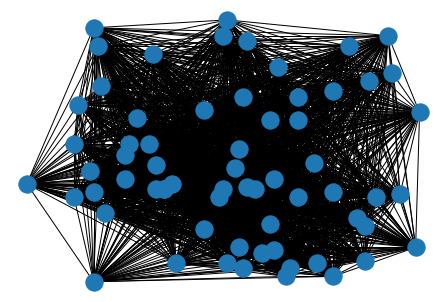

In [6]:
draw_plain_graph(m.data['V'], m.data['d'])

2020-10-07 00:58:31 INFO     
Name: 
Type: Graph
Number of nodes: 15
Number of edges: 120
Average degree:  16.0000


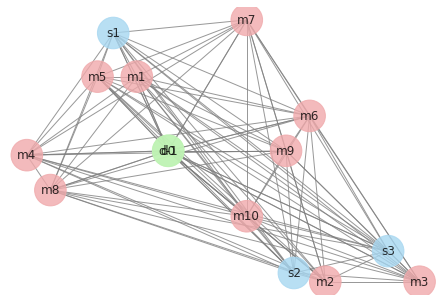

In [105]:
draw_graph(m.data['V'], m.data['d'])

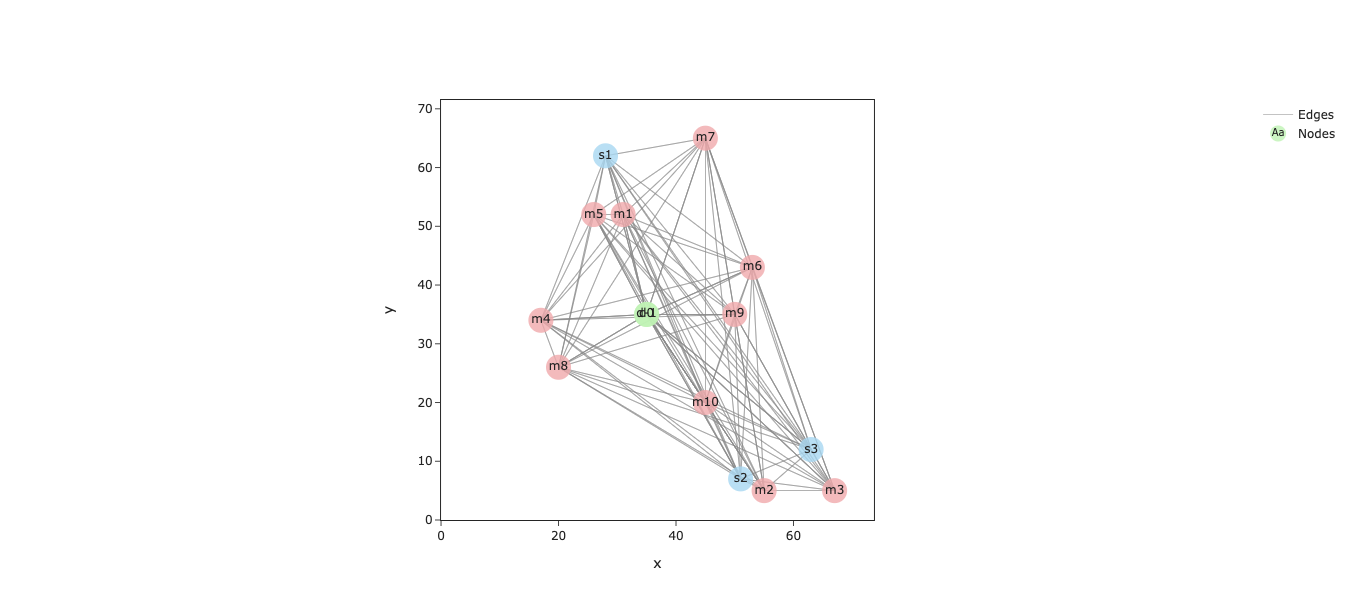

In [106]:
plot_interactive_graph(m.data['V'], d=m.data['d'])

In [159]:
e, e_flat = create_optimal_edges(m)

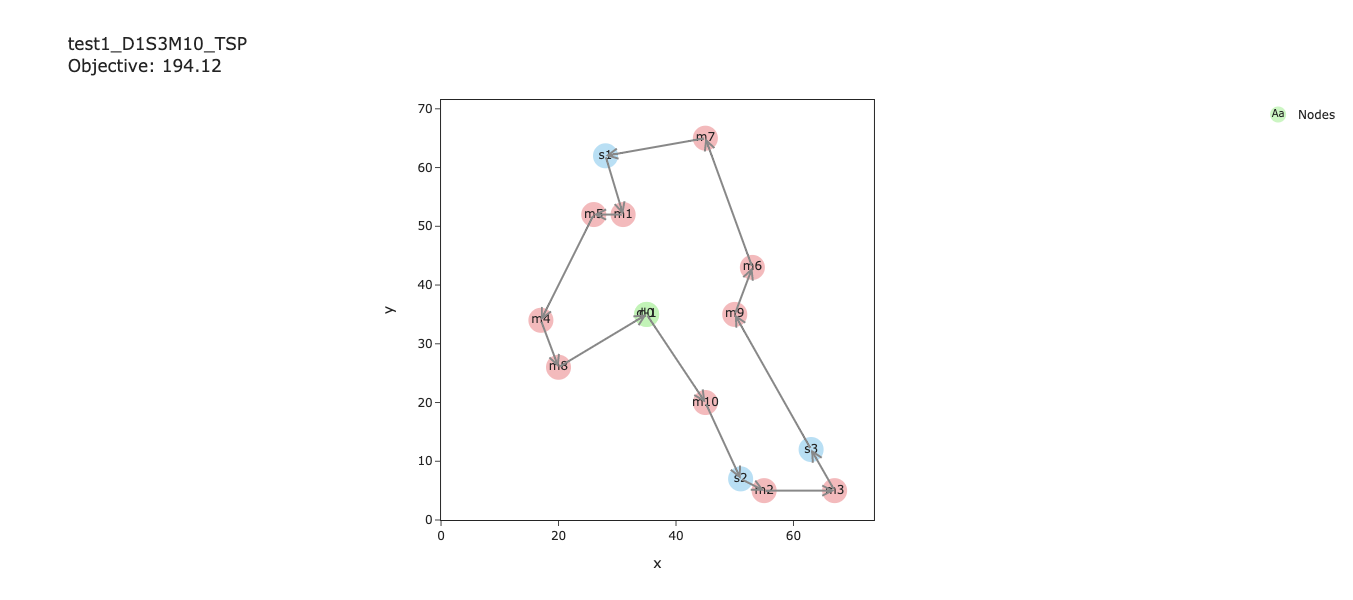

In [164]:
plot_interactive_graph(m.data['V'], e=e_flat, obj=m.instance.obj(), instance_name=m.instance_name)

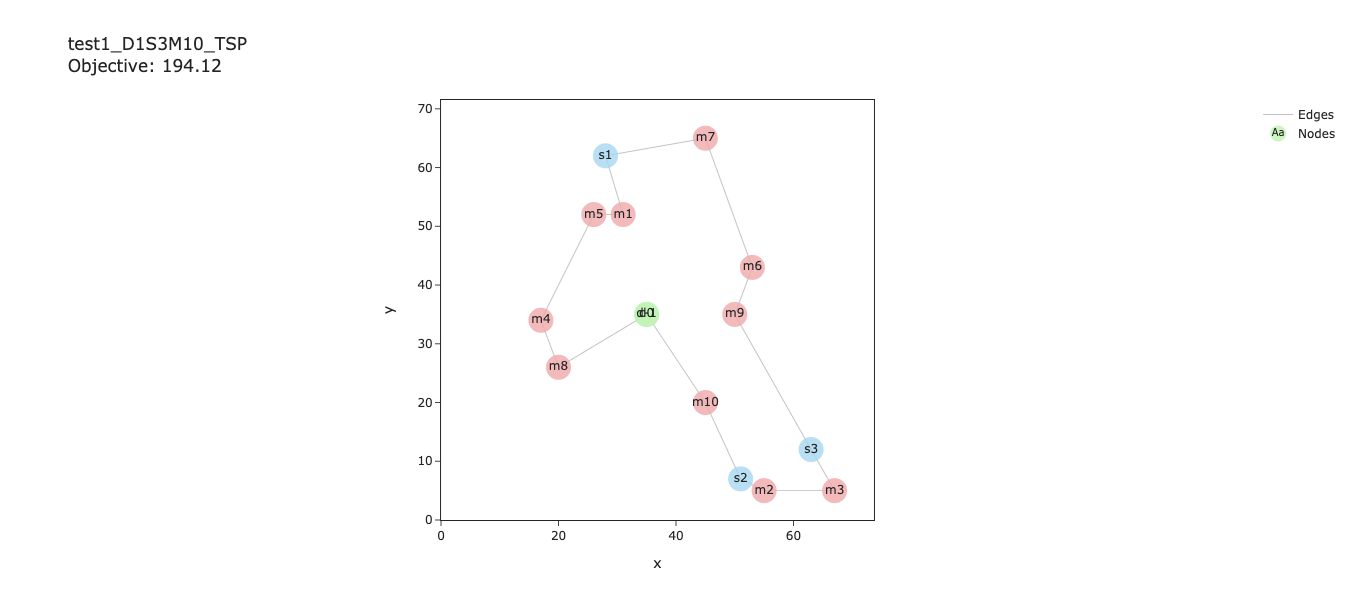

In [165]:
plot_interactive_graph(m.data['V'], d=e, obj=m.instance.obj(), instance_name=m.instance_name)

In [500]:
instance = 'D1S3M34_TSP'
fpath = 'config/test_instances/' + instance + '.csv'

In [502]:
m.solve(fpath)

2020-10-07 06:31:39 INFO     Importing TSP MILP instance: test2_D1S3M34_TSP
2020-10-07 06:31:39 INFO     Reading CSV
2020-10-07 06:31:39 INFO     Creating graph
2020-10-07 06:31:39 INFO     Calculating distance matrix
2020-10-07 06:31:39 INFO     Creating instance
2020-10-07 06:31:40 INFO     Solving instance...
2020-10-07 06:31:40 INFO     Parameter OutputFlag unchanged
2020-10-07 06:31:40 INFO        Value: 1  Min: 0  Max: 1  Default: 1
2020-10-07 06:31:40 INFO     Changed value of parameter LogFile to /var/folders/vv/1p3h17yx43n9m7k86th68_ym0000gn/T/tmp9959ruxk.log
2020-10-07 06:31:40 INFO        Prev:   Default: 
2020-10-07 06:31:40 INFO     Changed value of parameter threads to 4
2020-10-07 06:31:40 INFO        Prev: 0  Min: 0  Max: 1024  Default: 0
2020-10-07 06:31:40 INFO     Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)
2020-10-07 06:31:40 INFO     Optimize a model with 4162 rows, 4289 columns and 20416 nonzeros
2020-10-07 06:31:40 INFO     Model fingerprint: 0xadb0428

Parameter OutputFlag unchanged
   Value: 1  Min: 0  Max: 1  Default: 1
Changed value of parameter LogFile to /var/folders/vv/1p3h17yx43n9m7k86th68_ym0000gn/T/tmp9959ruxk.log
   Prev:   Default: 
Changed value of parameter threads to 4
   Prev: 0  Min: 0  Max: 1024  Default: 0
Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)
Optimize a model with 4162 rows, 4289 columns and 20416 nonzeros
Model fingerprint: 0xadb0428c
Variable types: 0 continuous, 4289 integer (4225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [2e+00, 1e+02]
  Bounds range     [1e+00, 6e+01]
  RHS range        [1e+00, 6e+01]
Presolve removed 0 rows and 65 columns
Presolve time: 0.03s
Presolved: 4162 rows, 4224 columns, 20416 nonzeros
Variable types: 0 continuous, 4224 integer (4160 binary)
Found heuristic solution: objective 3069.7010965

Root relaxation: objective 5.700007e+02, 293 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |    

In [503]:
print(m.results)


Problem: 
- Name: unknown
  Lower bound: 666.8200120500444
  Upper bound: 666.8200120500444
  Number of objectives: 1
  Number of constraints: 4162
  Number of variables: 4289
  Number of binary variables: 4225
  Number of integer variables: 4289
  Number of continuous variables: -4225
  Number of nonzeros: 20416
  Sense: 1
  Number of solutions: 10
Solver: 
- Name: Gurobi 9.02
  Status: ok
  Wallclock time: 9.833156108856201
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [504]:
e, e_flat = create_optimal_edges(m)

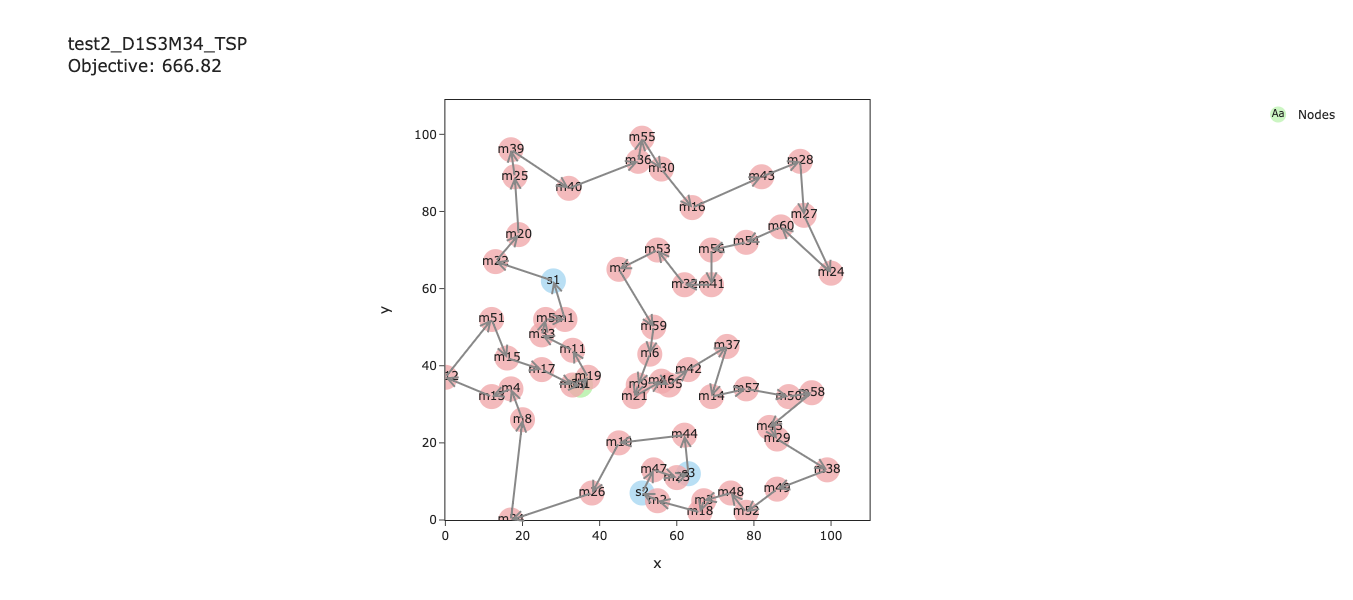

In [505]:
plot_interactive_graph(m.data['V'], e=e_flat, obj=m.instance.obj(), instance_name=m.instance_name)

In [3]:
instance = 'c103C15_VRPTW'
fpath = 'config/test_instances/' + instance + '.csv'

In [134]:
m = VRPTW()

2020-10-13 23:35:25 INFO     Building abstract model
2020-10-13 23:35:25 INFO     Defining parameters and sets
2020-10-13 23:35:25 INFO     Defining variables
2020-10-13 23:35:25 INFO     Defining constraints
2020-10-13 23:35:25 INFO     Defining objective
2020-10-13 23:35:25 INFO     Done building model


In [135]:
m.solve(fpath)

2020-10-13 23:35:26 INFO     Importing VRPTW MILP instance: c103C15_VRPTW
2020-10-13 23:35:26 INFO     Reading CSV
2020-10-13 23:35:26 INFO     Creating graph
2020-10-13 23:35:26 INFO     Calculating distance matrix
2020-10-13 23:35:26 INFO     Creating instance
2020-10-13 23:35:26 INFO     Solving instance...


Parameter OutputFlag unchanged


2020-10-13 23:35:26 INFO     Parameter OutputFlag unchanged


   Value: 1  Min: 0  Max: 1  Default: 1


2020-10-13 23:35:26 INFO        Value: 1  Min: 0  Max: 1  Default: 1


Changed value of parameter LogFile to /var/folders/vv/1p3h17yx43n9m7k86th68_ym0000gn/T/tmplmd17tx6.log


2020-10-13 23:35:26 INFO     Changed value of parameter LogFile to /var/folders/vv/1p3h17yx43n9m7k86th68_ym0000gn/T/tmplmd17tx6.log


   Prev:   Default: 


2020-10-13 23:35:26 INFO        Prev:   Default: 


Changed value of parameter threads to 4


2020-10-13 23:35:26 INFO     Changed value of parameter threads to 4


   Prev: 0  Min: 0  Max: 1024  Default: 0


2020-10-13 23:35:26 INFO        Prev: 0  Min: 0  Max: 1024  Default: 0


Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)


2020-10-13 23:35:26 INFO     Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)


Optimize a model with 2557 rows, 1449 columns and 10356 nonzeros


2020-10-13 23:35:26 INFO     Optimize a model with 2557 rows, 1449 columns and 10356 nonzeros


Model fingerprint: 0x8bb4f7cb


2020-10-13 23:35:26 INFO     Model fingerprint: 0x8bb4f7cb


Variable types: 0 continuous, 1449 integer (1323 binary)


2020-10-13 23:35:26 INFO     Variable types: 0 continuous, 1449 integer (1323 binary)


Coefficient statistics:


2020-10-13 23:35:26 INFO     Coefficient statistics:


  Matrix range     [1e+00, 1e+03]


2020-10-13 23:35:26 INFO       Matrix range     [1e+00, 1e+03]


  Objective range  [3e+00, 7e+01]


2020-10-13 23:35:26 INFO       Objective range  [3e+00, 7e+01]


  Bounds range     [1e+00, 1e+00]


2020-10-13 23:35:26 INFO       Bounds range     [1e+00, 1e+00]


  RHS range        [1e+00, 1e+03]


2020-10-13 23:35:26 INFO       RHS range        [1e+00, 1e+03]


Presolve removed 746 rows and 380 columns


2020-10-13 23:35:26 INFO     Presolve removed 746 rows and 380 columns


Presolve time: 0.04s


2020-10-13 23:35:26 INFO     Presolve time: 0.04s


Presolved: 1811 rows, 1069 columns, 7739 nonzeros


2020-10-13 23:35:26 INFO     Presolved: 1811 rows, 1069 columns, 7739 nonzeros


Variable types: 0 continuous, 1069 integer (967 binary)


2020-10-13 23:35:26 INFO     Variable types: 0 continuous, 1069 integer (967 binary)


2020-10-13 23:35:26 INFO     


Root relaxation: objective 2.652396e+02, 189 iterations, 0.00 seconds


2020-10-13 23:35:26 INFO     Root relaxation: objective 2.652396e+02, 189 iterations, 0.00 seconds


2020-10-13 23:35:26 INFO     


    Nodes    |    Current Node    |     Objective Bounds      |     Work


2020-10-13 23:35:26 INFO         Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


2020-10-13 23:35:26 INFO      Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


2020-10-13 23:35:26 INFO     


     0     0  265.23957    0   50          -  265.23957      -     -    0s


2020-10-13 23:35:26 INFO          0     0  265.23957    0   50          -  265.23957      -     -    0s


     0     0  266.23466    0   71          -  266.23466      -     -    0s


2020-10-13 23:35:27 INFO          0     0  266.23466    0   71          -  266.23466      -     -    0s


     0     0  267.50895    0   66          -  267.50895      -     -    0s


2020-10-13 23:35:27 INFO          0     0  267.50895    0   66          -  267.50895      -     -    0s


     0     0  269.77833    0   61          -  269.77833      -     -    0s


2020-10-13 23:35:27 INFO          0     0  269.77833    0   61          -  269.77833      -     -    0s


     0     0  271.77232    0   59          -  271.77232      -     -    0s


2020-10-13 23:35:27 INFO          0     0  271.77232    0   59          -  271.77232      -     -    0s


     0     0  271.77232    0  109          -  271.77232      -     -    0s


2020-10-13 23:35:27 INFO          0     0  271.77232    0  109          -  271.77232      -     -    0s


     0     0  271.77232    0  106          -  271.77232      -     -    0s


2020-10-13 23:35:27 INFO          0     0  271.77232    0  106          -  271.77232      -     -    0s


     0     0  278.50328    0   64          -  278.50328      -     -    0s


2020-10-13 23:35:27 INFO          0     0  278.50328    0   64          -  278.50328      -     -    0s


     0     0  278.50328    0   58          -  278.50328      -     -    0s


2020-10-13 23:35:27 INFO          0     0  278.50328    0   58          -  278.50328      -     -    0s


     0     0  282.34537    0   44          -  282.34537      -     -    0s


2020-10-13 23:35:27 INFO          0     0  282.34537    0   44          -  282.34537      -     -    0s


     0     0  282.34537    0   46          -  282.34537      -     -    0s


2020-10-13 23:35:27 INFO          0     0  282.34537    0   46          -  282.34537      -     -    0s


     0     0  283.39350    0   48          -  283.39350      -     -    0s


2020-10-13 23:35:27 INFO          0     0  283.39350    0   48          -  283.39350      -     -    0s


     0     0  284.65595    0   83          -  284.65595      -     -    0s


2020-10-13 23:35:27 INFO          0     0  284.65595    0   83          -  284.65595      -     -    0s


     0     0  284.65595    0   85          -  284.65595      -     -    0s


2020-10-13 23:35:27 INFO          0     0  284.65595    0   85          -  284.65595      -     -    0s


     0     0  284.70084    0  104          -  284.70084      -     -    0s


2020-10-13 23:35:27 INFO          0     0  284.70084    0  104          -  284.70084      -     -    0s


     0     0  284.70084    0   95          -  284.70084      -     -    0s


2020-10-13 23:35:27 INFO          0     0  284.70084    0   95          -  284.70084      -     -    0s


     0     0  284.79061    0   92          -  284.79061      -     -    0s


2020-10-13 23:35:27 INFO          0     0  284.79061    0   92          -  284.79061      -     -    0s


     0     0  284.79061    0   94          -  284.79061      -     -    0s


2020-10-13 23:35:27 INFO          0     0  284.79061    0   94          -  284.79061      -     -    0s


     0     0  284.79061    0   72          -  284.79061      -     -    0s


2020-10-13 23:35:27 INFO          0     0  284.79061    0   72          -  284.79061      -     -    0s


     0     0  284.79061    0   68          -  284.79061      -     -    0s


2020-10-13 23:35:27 INFO          0     0  284.79061    0   68          -  284.79061      -     -    0s


     0     0  284.79061    0   69          -  284.79061      -     -    0s


2020-10-13 23:35:27 INFO          0     0  284.79061    0   69          -  284.79061      -     -    0s


     0     0  284.79061    0   65          -  284.79061      -     -    0s


2020-10-13 23:35:27 INFO          0     0  284.79061    0   65          -  284.79061      -     -    0s


     0     2  286.69129    0   59          -  286.69129      -     -    0s


2020-10-13 23:35:27 INFO          0     2  286.69129    0   59          -  286.69129      -     -    0s


*  290   292              59     451.9041500  286.69129  36.6%  23.0    1s


2020-10-13 23:35:28 INFO     *  290   292              59     451.9041500  286.69129  36.6%  23.0    1s


H  436   388                     449.3387689  288.37358  35.8%  21.7    1s


2020-10-13 23:35:28 INFO     H  436   388                     449.3387689  288.37358  35.8%  21.7    1s


H  473   419                     439.4626665  288.37358  34.4%  21.5    1s


2020-10-13 23:35:28 INFO     H  473   419                     439.4626665  288.37358  34.4%  21.5    1s


H  511   445                     425.8635796  288.37358  32.3%  21.0    1s


2020-10-13 23:35:28 INFO     H  511   445                     425.8635796  288.37358  32.3%  21.0    1s


H  514   411                     397.2625165  288.37358  27.4%  21.0    1s


2020-10-13 23:35:28 INFO     H  514   411                     397.2625165  288.37358  27.4%  21.0    1s


H  552   438                     392.7237569  288.37358  26.6%  20.5    1s


2020-10-13 23:35:28 INFO     H  552   438                     392.7237569  288.37358  26.6%  20.5    1s


H 1088   777                     390.1085587  295.31852  24.3%  18.5    3s


2020-10-13 23:35:29 INFO     H 1088   777                     390.1085587  295.31852  24.3%  18.5    3s


H 1100   745                     377.6546688  298.17355  21.0%  18.3    3s


2020-10-13 23:35:30 INFO     H 1100   745                     377.6546688  298.17355  21.0%  18.3    3s


  1117   760  299.61104   10  157  377.65467  299.61104  20.7%  23.2    5s


2020-10-13 23:35:31 INFO       1117   760  299.61104   10  157  377.65467  299.61104  20.7%  23.2    5s


  4258  1760  332.37546   37   45  377.65467  311.18099  17.6%  34.1   10s


2020-10-13 23:35:37 INFO       4258  1760  332.37546   37   45  377.65467  311.18099  17.6%  34.1   10s


H 4260  1728                     373.9873582  311.18099  16.8%  34.1   10s


2020-10-13 23:35:37 INFO     H 4260  1728                     373.9873582  311.18099  16.8%  34.1   10s


* 8419  3180              40     371.0218292  316.14870  14.8%  34.2   13s


2020-10-13 23:35:40 INFO     * 8419  3180              40     371.0218292  316.14870  14.8%  34.2   13s


H 8674  3097                     368.7838439  316.45659  14.2%  34.0   14s


2020-10-13 23:35:41 INFO     H 8674  3097                     368.7838439  316.45659  14.2%  34.0   14s


H 8684  2762                     361.6029465  316.45659  12.5%  34.0   14s


2020-10-13 23:35:41 INFO     H 8684  2762                     361.6029465  316.45659  12.5%  34.0   14s


  9440  3016     cutoff   30       361.60295  317.04104  12.3%  34.0   15s


2020-10-13 23:35:41 INFO       9440  3016     cutoff   30       361.60295  317.04104  12.3%  34.0   15s


 15393  4323  357.23599   27   53  361.60295  322.43666  10.8%  33.4   20s


2020-10-13 23:35:46 INFO      15393  4323  357.23599   27   53  361.60295  322.43666  10.8%  33.4   20s


 20840  5338  358.09951   31   65  361.60295  325.69586  9.93%  33.3   34s


2020-10-13 23:36:01 INFO      20840  5338  358.09951   31   65  361.60295  325.69586  9.93%  33.3   34s


 20849  5344  355.17674   32  161  361.60295  325.69586  9.93%  33.3   35s


2020-10-13 23:36:01 INFO      20849  5344  355.17674   32  161  361.60295  325.69586  9.93%  33.3   35s


 20873  5360  328.19048   26  218  361.60295  325.69586  9.93%  33.2   40s


2020-10-13 23:36:06 INFO      20873  5360  328.19048   26  218  361.60295  325.69586  9.93%  33.2   40s


 20900  5378  347.41614   34  219  361.60295  325.69586  9.93%  33.2   45s


2020-10-13 23:36:12 INFO      20900  5378  347.41614   34  219  361.60295  325.69586  9.93%  33.2   45s


 20923  5393  343.72763   50  227  361.60295  325.69586  9.93%  33.2   50s


2020-10-13 23:36:17 INFO      20923  5393  343.72763   50  227  361.60295  325.69586  9.93%  33.2   50s


H20923  5121                     361.6029440  325.69586  9.93%  33.2   50s


2020-10-13 23:36:17 INFO     H20923  5121                     361.6029440  325.69586  9.93%  33.2   50s


H20929  4868                     361.6029040  325.69586  9.93%  33.1   52s


2020-10-13 23:36:19 INFO     H20929  4868                     361.6029040  325.69586  9.93%  33.1   52s


 20938  4874  353.58449   41  210  361.60290  325.69586  9.93%  33.1   55s


2020-10-13 23:36:22 INFO      20938  4874  353.58449   41  210  361.60290  325.69586  9.93%  33.1   55s


 20954  4885  346.41186   56  235  361.60290  325.69586  9.93%  33.1   60s


2020-10-13 23:36:26 INFO      20954  4885  346.41186   56  235  361.60290  325.69586  9.93%  33.1   60s


H20959  4641                     361.6028985  325.69586  9.93%  33.1   61s


2020-10-13 23:36:28 INFO     H20959  4641                     361.6028985  325.69586  9.93%  33.1   61s


 20968  4647  337.23076   23  241  361.60290  325.69586  9.93%  33.1   65s


2020-10-13 23:36:31 INFO      20968  4647  337.23076   23  241  361.60290  325.69586  9.93%  33.1   65s


 20983  4657  356.80427   49  242  361.60290  325.69586  9.93%  33.1   70s


2020-10-13 23:36:37 INFO      20983  4657  356.80427   49  242  361.60290  325.69586  9.93%  33.1   70s


 20997  4667  359.37662   40  235  361.60290  325.69586  9.93%  33.0   75s


2020-10-13 23:36:42 INFO      20997  4667  359.37662   40  235  361.60290  325.69586  9.93%  33.0   75s


 21031  4692  325.69586   27   58  361.60290  325.69586  9.93%  33.9   80s


2020-10-13 23:36:47 INFO      21031  4692  325.69586   27   58  361.60290  325.69586  9.93%  33.9   80s


 22323  5183  325.69586   40  110  361.60290  325.69586  9.93%  34.5   85s


2020-10-13 23:36:51 INFO      22323  5183  325.69586   40  110  361.60290  325.69586  9.93%  34.5   85s


 26160  6078  325.69586   48   99  361.60290  325.69586  9.93%  35.4   90s


2020-10-13 23:36:56 INFO      26160  6078  325.69586   48   99  361.60290  325.69586  9.93%  35.4   90s


 31049  6363  349.88575   40   66  361.60290  325.69586  9.93%  36.5   95s


2020-10-13 23:37:02 INFO      31049  6363  349.88575   40   66  361.60290  325.69586  9.93%  36.5   95s


H34075  5890                     359.3649612  325.69586  9.37%  36.8   99s


2020-10-13 23:37:06 INFO     H34075  5890                     359.3649612  325.69586  9.37%  36.8   99s


 34302  6059  336.46502   70  118  359.36496  325.69586  9.37%  36.9  100s


2020-10-13 23:37:07 INFO      34302  6059  336.46502   70  118  359.36496  325.69586  9.37%  36.9  100s


 39945  7253  337.32210   40   54  359.36496  327.91900  8.75%  36.4  105s


2020-10-13 23:37:12 INFO      39945  7253  337.32210   40   54  359.36496  327.91900  8.75%  36.4  105s


 44111  7507  345.92981   47   49  359.36496  330.44252  8.05%  36.4  110s


2020-10-13 23:37:17 INFO      44111  7507  345.92981   47   49  359.36496  330.44252  8.05%  36.4  110s


 49074  7343     cutoff   45       359.36496  332.87026  7.37%  36.4  115s


2020-10-13 23:37:22 INFO      49074  7343     cutoff   45       359.36496  332.87026  7.37%  36.4  115s


 53942  7016 infeasible   56       359.36496  335.45632  6.65%  36.3  120s


2020-10-13 23:37:26 INFO      53942  7016 infeasible   56       359.36496  335.45632  6.65%  36.3  120s


 59229  6756  352.30159   56   48  359.36496  338.06235  5.93%  36.0  125s


2020-10-13 23:37:32 INFO      59229  6756  352.30159   56   48  359.36496  338.06235  5.93%  36.0  125s


 64085  6432  354.10977  118  124  359.36496  340.24511  5.32%  35.6  130s


2020-10-13 23:37:37 INFO      64085  6432  354.10977  118  124  359.36496  340.24511  5.32%  35.6  130s


 68976  6083     cutoff   42       359.36496  342.29973  4.75%  35.3  135s


2020-10-13 23:37:42 INFO      68976  6083     cutoff   42       359.36496  342.29973  4.75%  35.3  135s


 74285  5194     cutoff   52       359.36496  344.81799  4.05%  34.8  140s


2020-10-13 23:37:47 INFO      74285  5194     cutoff   52       359.36496  344.81799  4.05%  34.8  140s


 80525  3883     cutoff   38       359.36496  347.68706  3.25%  34.2  145s


2020-10-13 23:37:52 INFO      80525  3883     cutoff   38       359.36496  347.68706  3.25%  34.2  145s


 86863  1654     cutoff   50       359.36496  352.50333  1.91%  33.7  150s


2020-10-13 23:37:57 INFO      86863  1654     cutoff   50       359.36496  352.50333  1.91%  33.7  150s


2020-10-13 23:37:59 INFO     


Cutting planes:


2020-10-13 23:37:59 INFO     Cutting planes:


  Gomory: 19


2020-10-13 23:37:59 INFO       Gomory: 19


  Implied bound: 106


2020-10-13 23:37:59 INFO       Implied bound: 106


  Projected implied bound: 43


2020-10-13 23:37:59 INFO       Projected implied bound: 43


  MIR: 92


2020-10-13 23:37:59 INFO       MIR: 92


  StrongCG: 4


2020-10-13 23:37:59 INFO       StrongCG: 4


  Flow cover: 392


2020-10-13 23:37:59 INFO       Flow cover: 392


  GUB cover: 2


2020-10-13 23:37:59 INFO       GUB cover: 2


  Inf proof: 22


2020-10-13 23:37:59 INFO       Inf proof: 22


  Zero half: 89


2020-10-13 23:37:59 INFO       Zero half: 89


  RLT: 91


2020-10-13 23:37:59 INFO       RLT: 91


  Relax-and-lift: 34


2020-10-13 23:37:59 INFO       Relax-and-lift: 34


2020-10-13 23:37:59 INFO     


Explored 89641 nodes (2981519 simplex iterations) in 152.22 seconds


2020-10-13 23:37:59 INFO     Explored 89641 nodes (2981519 simplex iterations) in 152.22 seconds


Thread count was 4 (of 8 available processors)


2020-10-13 23:37:59 INFO     Thread count was 4 (of 8 available processors)


2020-10-13 23:37:59 INFO     


Solution count 10: 359.365 361.603 361.603 ... 397.263


2020-10-13 23:37:59 INFO     Solution count 10: 359.365 361.603 361.603 ... 397.263


2020-10-13 23:37:59 INFO     


Optimal solution found (tolerance 1.00e-04)


2020-10-13 23:37:59 INFO     Optimal solution found (tolerance 1.00e-04)


Best objective 3.593649611774e+02, best bound 3.593649611774e+02, gap 0.0000%


2020-10-13 23:37:59 INFO     Best objective 3.593649611774e+02, best bound 3.593649611774e+02, gap 0.0000%


Changed value of parameter LogFile to 


2020-10-13 23:37:59 INFO     Changed value of parameter LogFile to 


   Prev: /var/folders/vv/1p3h17yx43n9m7k86th68_ym0000gn/T/tmplmd17tx6.log  Default: 


2020-10-13 23:37:59 INFO        Prev: /var/folders/vv/1p3h17yx43n9m7k86th68_ym0000gn/T/tmplmd17tx6.log  Default: 
2020-10-13 23:37:59 INFO     Done


In [136]:
print(m.results)


Problem: 
- Name: unknown
  Lower bound: 359.36496117739154
  Upper bound: 359.36496117739154
  Number of objectives: 1
  Number of constraints: 2557
  Number of variables: 1449
  Number of binary variables: 1323
  Number of integer variables: 1449
  Number of continuous variables: -1323
  Number of nonzeros: 10356
  Sense: 1
  Number of solutions: 10
Solver: 
- Name: Gurobi 9.02
  Status: ok
  Wallclock time: 152.24401307106018
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [137]:
var_list = ['xgamma', 'xw', 'xq']
x = merge_variable_results(m, var_list)

In [138]:
x[x['state']>0].sort_values(['vehicle', 'xw'])

vehicle from   to  state      xw     xq
378         1   d0  C85    1.0    30.0  200.0
186         1  C85  C98    1.0   468.0   40.0
323         1  C98  C95    1.0   565.0   30.0
57          1  C95   S3    1.0   661.0   20.0
254         1   S3  C10    1.0   779.0   10.0
33          1  C10  d-1    1.0  1236.0    0.0
630         2   d0  C59    1.0    66.0  200.0
870         2  C59  C40    1.0   172.0  190.0
566         2  C40  S15    1.0   268.0  180.0
803         2  S15  C33    1.0   437.0  170.0
668         2  C33  C35    1.0   655.0   50.0
535         2  C35  S13    1.0   763.0   40.0
739         2  S13  C50    1.0   858.0   30.0
728         2  C50  C44    1.0   955.0   20.0
580         2  C44  C61    1.0  1064.0   10.0
468         2  C61  d-1    1.0  1236.0    0.0
1029        3   d0  C30    1.0    21.0  200.0
1225        3  C30  C18    1.0   132.0   40.0
1297        3  C18  C19    1.0   513.0   30.0
964         3  C19   S7    1.0   610.0   20.0
1116        3   S7  C13    1.0  1106.0   10.0
914         3  C13  d-1    1.0  1236.0    0.0

In [139]:
e, e_flat = create_optimal_edges(m, x=x)

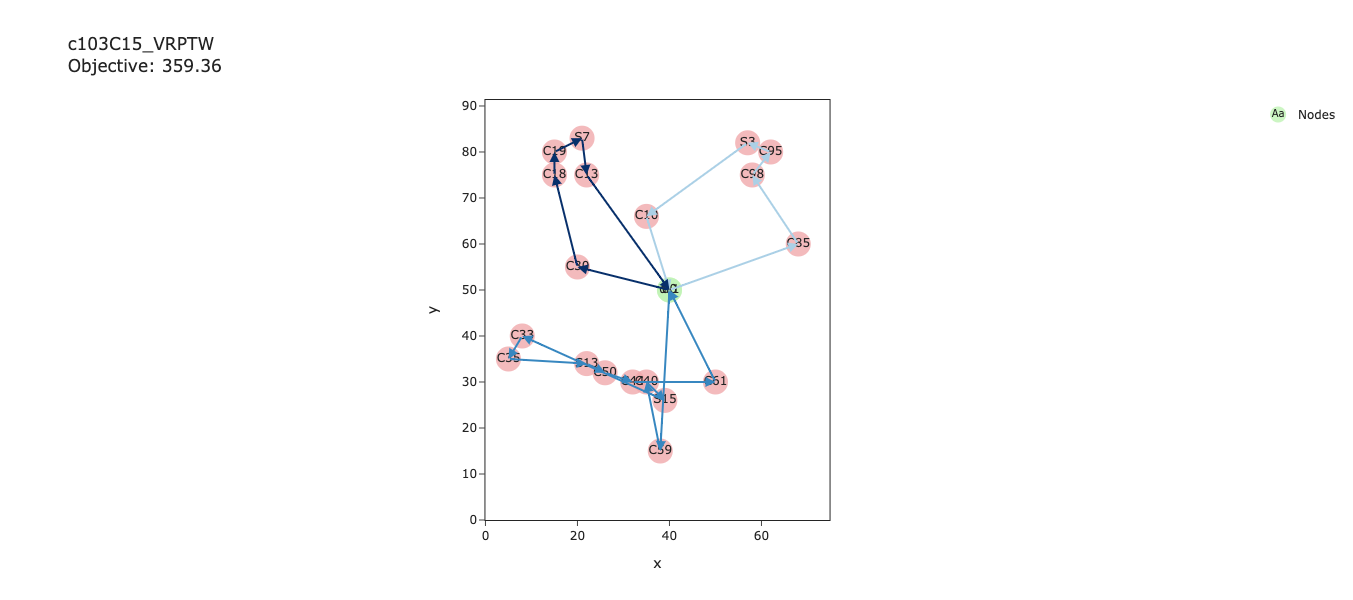

In [140]:
plot_interactive_graph(m.data['V'], e=e_flat, obj=m.instance.obj(), instance_name=m.instance_name)

In [131]:
x[x['link']>0].sort_values(['vehicle','time'])

vehicle from_node to_node  link    time  payload
63          1        d0      S7   1.0    -0.0    200.0
423         1        S7     C40   1.0   199.0     40.0
419         1       C40     C19   1.0   509.0     30.0
145         1       C19     C61   1.0   980.0     20.0
153         1       C61     C30   1.0  1125.0     10.0
28          1       C30     d-1   1.0  1236.0     -0.0
798         2        d0     C33   1.0   355.0    200.0
836         2       C33     C85   1.0   509.0     50.0
669         2       C85     C35   1.0   667.0     40.0
619         2       C35     C98   1.0   824.0     30.0
722         2       C98     C44   1.0   966.0     20.0
685         2       C44     C13   1.0  1106.0     10.0
473         2       C13     d-1   1.0  1236.0     -0.0
1071        3        d0     C59   1.0    66.0    200.0
933         3       C59      S3   1.0   257.0    135.0
968         3        S3     S13   1.0   407.0    125.0
1201        3       S13     C95   1.0   558.0    115.0
1191        3       C95     C50   1.0   708.0    105.0
1148        3       C50     C10   1.0   834.0     95.0
999         3       C10     S15   1.0   965.0     85.0
1223        3       S15     C18   1.0  1110.0     75.0
919         3       C18     d-1   1.0  1236.0     -0.0

In [134]:
x[(x['vehicle']==2) & (x['from_node']=='d0')]

vehicle from_node to_node  link    time  payload
441        2        d0      d0   0.0     0.0    200.0
462        2        d0     d-1   0.0  1236.0     -0.0
483        2        d0      S3  -0.0   886.0    190.0
504        2        d0      S7   0.0   344.0      9.0
525        2        d0     S13   0.0   737.0    200.0
546        2        d0     S15   0.0    33.0    200.0
567        2        d0     C61   0.0  1064.0      9.0
588        2        d0     C30  -0.0   975.0      9.0
609        2        d0     C98   0.0   824.0     30.0
630        2        d0     C59  -0.0    66.0    200.0
651        2        d0     C35  -0.0   667.0     40.0
672        2        d0     C13  -0.0  1106.0     10.0
693        2        d0     C10  -0.0   779.0      0.0
714        2        d0     C44   0.0   966.0     20.0
735        2        d0     C50  -0.0  1123.0     -0.0
756        2        d0     C95   0.0   202.0     -0.0
777        2        d0     C18  -0.0    -0.0    190.0
798        2        d0     C33   1.0   355.0    200.0
819        2        d0     C85   0.0   509.0     50.0
840        2        d0     C19   0.0   513.0      0.0
861        2        d0     C40   0.0   199.0     -0.0

In [9]:
m.instance.constraint_visit_customers.pprint()

constraint_visit_customers : Size=19, Index=V, Active=True
    Key : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       